In [41]:
import pandas as pd

In [42]:
import numpy as np

In [107]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
df=pd.read_csv('Social_Network_Ads.csv')

In [109]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [110]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [111]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [112]:
df.shape

(400, 5)

In [113]:
df_x=df[['Age','EstimatedSalary']]
df_y=df['Purchased']

In [114]:
df_x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [115]:
df_y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [116]:
df_x.values

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [117]:
df_y.values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [118]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size= 0.33, random_state= 42)

In [119]:
from sklearn. preprocessing import StandardScaler

In [120]:
scaler=StandardScaler()

In [121]:
scaler.fit(x_train)

StandardScaler()

In [122]:
x_train=scaler.transform(x_train)

In [123]:
x_test=scaler.transform(x_test)

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
logreg=LogisticRegression()

In [126]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [127]:
y_predict=logreg.predict(x_test)
print(y_predict)

[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0]


In [128]:
print(logreg.coef_)

[[1.83257149 1.0898586 ]]


In [129]:
var=logreg.predict([[35,20000]])

In [130]:
print(var)

[1]


In [3]:
#Making the Confusion Matrix

In [134]:
from sklearn.metrics import plot_roc_curve, confusion_matrix, f1_score,precision_score,recall_score,accuracy_score
cm = metrics.confusion_matrix(y_test,y_predict)
cm
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

(79, 1, 20, 32)

In [138]:
cm_df = pd.DataFrame(cm, columns = ['Predicted Negative', 'Predicted Positive'],index = ['Actual Negative', 'Actual Positive'])

In [139]:
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,79,1
Actual Positive,20,32


In [146]:
p=metrics.precision_score(y_test, y_predict)
r=metrics.recall_score(y_test, y_predict)
a=metrics.accuracy_score(y_test, y_predict)
f1=metrics.f1_score(y_test, y_predict)
print("precision_score:",p)
print("recall_score:",r)
print("accuracy_score:",a)
print("f1_score:",f1)
metrics.roc_curve(y_predict,y_test)

precision_score: 0.9696969696969697
recall_score: 0.6153846153846154
accuracy_score: 0.8409090909090909
f1_score: 0.7529411764705882


(array([0.       , 0.2020202, 1.       ]),
 array([0.        , 0.96969697, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [149]:
fpr,tpr,th=metrics.roc_curve(y_predict,y_test)

In [150]:
import matplotlib.pyplot as plt

In [151]:
roc_auc=metrics.auc(fpr,tpr)

In [152]:
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)

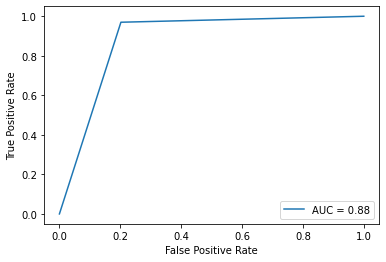

In [153]:
display.plot()